# IMPORT CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
pd.options.display.max_rows = 200

#### Continue from Scrape - read in CSV

In [120]:
df = pd.read_csv('Jobstreet_Ziig.csv')

In [121]:
jobstreet_df = df.copy()

In [122]:
jobstreet_df = jobstreet_df.reset_index(drop=True)

In [123]:
jobstreet_df = jobstreet_df.drop('Unnamed: 0', axis=1)

In [124]:
jobstreet_df = jobstreet_df.drop('Requirements', axis=1)

## DATA CLEANING

#### DROP DUPLICATES

In [125]:
jobstreet_df = jobstreet_df.drop_duplicates()

In [126]:
jobstreet_df.describe()

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD
count,1355,1355,1355,1355,1355,1355,1355,1355,1355
unique,429,1135,200,394,51,1316,53,195,1288
top,(Recruitment Firm),Business Analyst,Singapore - Central,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),Aboveexpectedsalary,Basic Up To $6000 + VB Experience In Microsoft...
freq,163,36,503,388,740,4,141,313,5


In [612]:
jobstreet_df.isnull().sum()

Company            0
Title              0
Location           0
Address            0
Industry           0
Job Description    0
Seniority          0
Salary             0
JD                 0
dtype: int64

In [613]:
jobstreet_df.head()

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD
0,Career Edge Asia Pte Ltd,Senior Data Analyst ($7K - $8K / CBD/ MNC ) re...,Singapore - Across Singapore,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),6000-8000,Responsibilities Responsible for dashboards an...
1,YGP Pte Ltd,Data Analyst,Singapore - Central - Downtown Core - Tanjong ...,79 Anson Road Singapore,Automobile/Automotive Ancillary/Vehicle,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Junior Executive),3000-4000,Application Management\r\n\r\n Register & gath...
2,None,Data Analyst,Singapore - Central,2 Bukit Merah Central Podium #04-00,Wood/Fibre/Paper,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,3500-4900,Key Responsibilities Report to the Market Anal...
3,nSearch Global Pte Ltd,Senior Business Analyst - Data Analytics / Pro...,Singapore - Central,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 5 years (Senior Executive),Aboveexpectedsalary,One of Asia-Pacifics leading organizations is ...
4,Adecco Personnel Pte Ltd.,Data Analyst- Pivot Table/ V-Look-up,Singapore - Across Singapore - Singapore,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,3000-5000,The Opportunity Adecco is partnering with a r...


## Feature Engineering

In [127]:
# Import the regex module
import re

### Job Level Feature

In [137]:
inbracket_pattern = '\((.*?)\)'

In [138]:
re.findall(inbracket_pattern, jobstreet_df['Seniority'].values[0])[0]

'Senior Executive'

In [139]:
def job_level(x):
    if x in ['Junior Executive', 'Entry Level', 'Senior Executive', 'Senior Manager', 'Manager', 'None']:
        return x
    else:
        return re.findall(inbracket_pattern, x)[0]

In [140]:
jobstreet_df['Job Level'] = jobstreet_df['Seniority'].apply(job_level)

In [141]:
jobstreet_df['Job Level'].value_counts()

Senior Executive    497
Junior Executive    399
Manager             214
Entry Level         106
Senior Manager       70
Non-Executive        68
None                  1
Name: Job Level, dtype: int64

### Min years Experience feature

In [129]:
jobstreet_df.Seniority.value_counts()

Min 3 years (Senior Executive)     141
Min 2 years (Junior Executive)     129
Min 5 years (Senior Executive)     127
Min 2 years (Senior Executive)      91
Entry Level                         86
Min 1 year (Junior Executive)       86
Junior Executive                    79
Min 3 years (Junior Executive)      75
Min 5 years (Manager)               72
Min 4 years (Senior Executive)      51
Min 3 years (Manager)               38
Min 1 year (Manager)                27
Senior Executive                    22
Min 4 years (Manager)               21
Senior Manager                      21
Min 1 year (Senior Executive)       19
Min 6 years (Senior Executive)      18
Min 2 years (Non-Executive)         17
Min 5 years (Senior Manager)        16
Min 3 years (Non-Executive)         16
Min 5 years (Non-Executive)         16
Min 1 year (Entry Level)            15
Min 4 years (Junior Executive)      15
Min 2 years (Manager)               14
Min 8 years (Senior Manager)        13
Min 8 years (Senior Execu

In [130]:
jobstreet_df['Seniority'].values[0]

'Min 3 years (Senior Executive)'

In [131]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, jobstreet_df['Seniority'].values[0]))

['3']


In [144]:
def juniorexec_or_entry(x):
    if x == 'Entry Level' or x == 'Junior Executive':
        return 1
    elif x in ['Senior Executive', 'Senior Manager', 'Manager', 'None']:
        return np.nan
    else:
        return int(''.join(re.findall(digits, x)))

In [133]:
# MINIMUM YEARS OF EXPERIENCE FEATURE
jobstreet_df['Min Years Exp'] = jobstreet_df['Seniority'].apply(fix_minyrexp)

In [134]:
jobstreet_df['Min Years Exp'].isnull().sum()

56

In [135]:
jobstreet_df['Min Years Exp'].value_counts()

1.0     323
3.0     279
2.0     252
5.0     243
4.0      92
8.0      36
6.0      26
7.0      24
10.0     20
15.0      2
9.0       1
12.0      1
Name: Min Years Exp, dtype: int64

In [156]:
jobstreet_df[jobstreet_df['Min Years Exp'].isnull()]

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD,Min Years Exp,Job Level
163,The HR Ecology Pte Ltd,Data Analyst Intern (3 months) $1500 (Internship),Singapore - Central,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",None,1400-1500,Our Client (A global management consulting fir...,NaN,None


In [143]:
## Impute Min Years Exp for ['Senior Executive', 'Senior Manager', 'Manager', 'None']

jobstreet_df.groupby('Job Level')['Min Years Exp'].mean()

Job Level
Entry Level         1.103774
Junior Executive    2.005013
Manager             4.188119
Non-Executive       3.264706
None                     NaN
Senior Executive    3.774737
Senior Manager      6.775510
Name: Min Years Exp, dtype: float64

In [148]:
## Fix Nans in Min Years Exp for SENIOR EXECUTIVE
x = jobstreet_df[(jobstreet_df['Min Years Exp'].isnull())\
             &(jobstreet_df['Job Level'] == 'Senior Executive')]

In [149]:
jobstreet_df.loc[x.index, 'Min Years Exp'] = 4.0

In [151]:
## Fix Nans in Min Years Exp for SENIOR MANAGER
x = jobstreet_df[(jobstreet_df['Min Years Exp'].isnull())\
             &(jobstreet_df['Job Level'] == 'Senior Manager')]

In [152]:
jobstreet_df.loc[x.index, 'Min Years Exp'] = 7.0

In [154]:
## Fix Nans in Min Years Exp for MANAGER
x = jobstreet_df[(jobstreet_df['Min Years Exp'].isnull())\
             &(jobstreet_df['Job Level'] == 'Manager')]

In [155]:
jobstreet_df.loc[x.index, 'Min Years Exp'] = 4.0

### NO INTERNSHIPS - Take out Internships as they affect the price prediction

In [157]:
interns = jobstreet_df[(jobstreet_df['Title'].str.contains('Intern')) & (
    (jobstreet_df.Seniority == 'Entry Level') | (jobstreet_df.Seniority == 'None'))]

In [158]:
jobstreet_df.drop(interns.index, axis=0, inplace=True)

In [159]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 2553
Data columns (total 11 columns):
Company            1347 non-null object
Title              1347 non-null object
Location           1347 non-null object
Address            1347 non-null object
Industry           1347 non-null object
Job Description    1347 non-null object
Seniority          1347 non-null object
Salary             1347 non-null object
JD                 1347 non-null object
Min Years Exp      1347 non-null float64
Job Level          1347 non-null object
dtypes: float64(1), object(10)
memory usage: 126.3+ KB


### Fix Title - Base Titles (DS, DA, BA, BI etc)

#### Create the Base Title Feature

In [160]:
jobstreet_df.Title.value_counts()

Business Analyst                                                                                                            36
Data Scientist                                                                                                              19
Data Analyst                                                                                                                11
Business Development Manager                                                                                                 5
Recruitment Consultant                                                                                                       5
IT Business Analyst                                                                                                          5
Data Engineer                                                                                                                5
URGENT: Business Analyst (Changi, SAP, MNC)                                                                    

In [161]:
def base_title(x):
    if 'data scientist' in x.lower():
        return 'DS'
    elif 'data science' in x.lower():
        return 'DS'
    elif 'machine learning' in x.lower():
        return 'DS'
    elif 'data analytics' in x.lower():
        return 'DA'
    elif 'data analysis' in x.lower():
        return 'DA'
    elif 'data analyst' in x.lower():
        return 'DA'
    elif 'data engineer' in x.lower():
        return 'DE'
    elif 'business analyst' in x.lower():
        return 'BA'
    elif 'business analytics' in x.lower():
        return 'BA'
    elif 'business intelligent' in x.lower():
        return 'BI'
    elif 'business intelligence' in x.lower():
        return 'BI'
    elif 'bi analyst' in x.lower():
        return 'BI'
    elif 'scientist' in x.lower():
        return 'RS'  # Research Scientist
    elif 'data architect' in x.lower():
        return 'DArch'  # Data Architect
    else:
        return 'OTHER'

In [162]:
jobstreet_df['Base Title'] = jobstreet_df['Title'].apply(base_title)

In [163]:
jobstreet_df['Base Title'].value_counts()

OTHER    786
BA       250
DA       135
DS        67
RS        54
BI        43
DE         9
DArch      3
Name: Base Title, dtype: int64

In [164]:
jobstreet_df['Base Title'].value_counts(
)/jobstreet_df['Base Title'].value_counts().sum()

OTHER    0.583519
BA       0.185598
DA       0.100223
DS       0.049740
RS       0.040089
BI       0.031923
DE       0.006682
DArch    0.002227
Name: Base Title, dtype: float64

In [165]:
jobstreet_df[jobstreet_df['Base Title'] == 'DS']

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD,Min Years Exp,Job Level,Base Title
94,M1 Limited,Senior/Data Analyst (Data Science Team),Singapore - West,10 International Business Park Singapore 609928,Telecommunication,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Senior Executive),Aroundexpectedsalary,Job ResponsibilitiesWork closely with the data...,2.0,Senior Executive,DS
147,Building and Construction Authority (BCA),Data Analyst / Data Scientist (Economic Resear...,Singapore - Central,"52 Jurong Gateway Road, #11-01, Singapore 608550",Government/Defence,"<div class=""unselectable wrap-text"" id=""job_de...",Min 1 year (Junior Executive),Aroundexpectedsalary,ResponsibilitiesYou will help to identify valu...,1.0,Junior Executive,DS
152,HRnet One Pte Ltd,Data And Research Analyst (Data Scientist),Singapore - Central,391A Orchard Road #23-06 Ngee Ann City Tower A,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),5500-7000,Responsibilities Conduct research in the areas...,3.0,Senior Executive,DS
201,(Recruitment Firm),Data Scientist / Analyst ( UP $7K/ JURONG/ PhD...,Singapore - West,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Manager),6000-7000,UP $7K / MNC Jurong Area AWS + BONUS PHD / Mas...,2.0,Manager,DS
784,"National University of Singapore, Office of Hu...",Data Scientist - (008J6),Singapore - Across Singapore - Singapore,None,Education,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,None,1. Work with Industry Partners in Challenging ...,1.0,Entry Level,DS
785,(Recruitment Firm),Data Scientist,Singapore - Across Singapore - Singapore,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Junior Executive,6000-10000,about the companyOur client is expanding their...,1.0,Junior Executive,DS
791,United Overseas Bank Limited (UOB),"VP/AVP, Data Scientist, Big Data Analytics Gro...",Singapore - Across Singapore - Singapore,None,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Min 5 years (Senior Executive),Aboveexpectedsalary,TheData Management Office (DMO)is a business f...,5.0,Senior Executive,DS
794,MBA Michael Bailey Associates Pte Ltd,Data Scientist x2,Singapore - Central - Queenstown,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Non-Executive),4500-6000,"Responsible for applying Data Science, i.e. Ma...",3.0,Non-Executive,DS
795,RGF Talent Solutions Singapore Pte Ltd,Machine Learning Engineer/ Data Scientist (JO-...,Singapore - Across Singapore,71 Robinson Road Singapore #0504 Singapore 068895,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Senior Executive),Aboveexpectedsalary,About The ClientOur cliennt is leading Ad Netw...,2.0,Senior Executive,DS
796,Medtronic,Senior Supply Chain Data Scientist,Singapore - East - Pasir Ris,"50 Pasir Panjang Rd, Singapore 117440",Healthcare/Medical,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),4000-5000,The Data Scientist will be responsible for des...,3.0,Senior Executive,DS


### Fix Location

In [166]:
jobstreet_df['Location'].value_counts()

Singapore - Central                                                              501
Singapore - Across Singapore                                                     168
Singapore - Across Singapore - Singapore                                         140
Singapore - West                                                                 132
Singapore - East                                                                  45
Singapore - North-East                                                            27
None                                                                              15
Singapore - Central - Downtown Core                                               13
Singapore - North                                                                 12
Singapore - Central - Downtown Core - Cityhall                                     9
Singapore - East - Paya Lebar                                                      9
Singapore - Central - Kallang - Kallang                          

In [167]:
aus = jobstreet_df[jobstreet_df['Location']
                   == 'Australia - Across Australia']  # WTF

In [168]:
jobstreet_df.drop(aus.index, axis=0, inplace=True)

In [169]:
jobstreet_df['Location'].value_counts()

Singapore - Central                                                              501
Singapore - Across Singapore                                                     168
Singapore - Across Singapore - Singapore                                         140
Singapore - West                                                                 132
Singapore - East                                                                  45
Singapore - North-East                                                            27
None                                                                              15
Singapore - Central - Downtown Core                                               13
Singapore - North                                                                 12
Singapore - East - Paya Lebar                                                      9
Singapore - Central - Downtown Core - Cityhall                                     9
Singapore - Central - Kallang - Kallang                          

In [170]:
thai = jobstreet_df[jobstreet_df['Location']
                    == 'Thailand - Bangkok']  # WTF NOPE

In [171]:
jobstreet_df.drop(thai.index, axis=0, inplace=True)

In [172]:
jobstreet_df['Location'].value_counts()

Singapore - Central                                                              501
Singapore - Across Singapore                                                     168
Singapore - Across Singapore - Singapore                                         140
Singapore - West                                                                 132
Singapore - East                                                                  45
Singapore - North-East                                                            27
None                                                                              15
Singapore - Central - Downtown Core                                               13
Singapore - North                                                                 12
Singapore - Central - Downtown Core - Cityhall                                     9
Singapore - East - Paya Lebar                                                      9
Singapore - Central - Kallang - Kallang                          

In [173]:
not_in_sg = jobstreet_df[~jobstreet_df['Location'].str.contains(
    'Singapore|None')]

In [174]:
jobstreet_df.drop(not_in_sg.index, axis=0, inplace=True)

In [175]:
jobstreet_df['Location'].value_counts()

Singapore - Central                                                              501
Singapore - Across Singapore                                                     168
Singapore - Across Singapore - Singapore                                         140
Singapore - West                                                                 132
Singapore - East                                                                  45
Singapore - North-East                                                            27
None                                                                              15
Singapore - Central - Downtown Core                                               13
Singapore - North                                                                 12
Singapore - Central - Downtown Core - Cityhall                                     9
Singapore - East - Paya Lebar                                                      9
Singapore - Central - Kallang - Kallang                          

In [176]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 2553
Data columns (total 12 columns):
Company            1338 non-null object
Title              1338 non-null object
Location           1338 non-null object
Address            1338 non-null object
Industry           1338 non-null object
Job Description    1338 non-null object
Seniority          1338 non-null object
Salary             1338 non-null object
JD                 1338 non-null object
Min Years Exp      1338 non-null float64
Job Level          1338 non-null object
Base Title         1338 non-null object
dtypes: float64(1), object(11)
memory usage: 135.9+ KB


### !!!! PITSTOP !!!! - to_csv('Jobstreet_Ziig_FEng') prev, now Jobstreet_Ziig_FEng_1338

In [177]:
jobstreet_df.to_csv('Jobstreet_Ziig_FEng_1338.csv')

In [178]:
jobstreet_df = pd.read_csv('Jobstreet_Ziig_FEng_1338.csv')

In [179]:
jobstreet_df = jobstreet_df.reset_index(drop=True)
jobstreet_df = jobstreet_df.drop('Unnamed: 0', axis=1)

### Clean Up Address

In [180]:
mask = (jobstreet_df['Address'].str.len() < 5)
df = jobstreet_df.loc[mask]

In [181]:
df.Address.value_counts()

None    380
-        15
CBD       2
.         1
Name: Address, dtype: int64

In [182]:
def address_to_null(x):
    if x in ['None', '-', '.']:
        return np.nan  # Replace with NaNs
    else:
        return x

In [183]:
jobstreet_df['Address'] = jobstreet_df['Address'].apply(address_to_null)

In [184]:
jobstreet_df['Address'].value_counts()

8 Marina View #11-01 Asia Square Tower 1 Singapore 018960                                                              108
8 Marina View, #11-01 Asia Square Tower 1, Singapore 018960                                                             43
1 Fusionopolis Way Singapore #21-01 Connexis (South Tower) Singapore 138632                                             39
6 Shenton Way Tower 1 #39-03 Singapore 068809                                                                           36
391A Orchard Road #12-08 Ngee Ann City Tower A S(238873)                                                                19
One Raffles Place Tower 2 #09-61 Singapore 048616                                                                       18
8 Marina View, #11-01, Asia Square Tower 1 Singapore 018960                                                             17
Singapore                                                                                                               15
7500A Beach Road

### Clean up Base Title

In [185]:
# EXTRACT MORE BASE TITLES

In [186]:
ActuallyDA = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                          & (jobstreet_df['JD'].str.contains('Data Analyst'))
                          & (jobstreet_df['Base Title'] == 'OTHER')]

In [187]:
jobstreet_df.iloc[ActuallyDA.index, df.columns.get_loc('Base Title')] = 'DA'

In [188]:
jobstreet_df.iloc[ActuallyDA.index, df.columns.get_loc('Base Title')]

109    DA
769    DA
Name: Base Title, dtype: object

In [189]:
# DROP COZ WE DONT NEED MORE OF THESE ENTRIES (10 of them)
ToDrop = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                      & (jobstreet_df['JD'].str.contains('Business Analyst'))
                      & (jobstreet_df['Base Title'] == 'OTHER')]  # ['JD'].values

In [190]:
ToDrop.index

Int64Index([290, 317, 385, 654, 661, 705, 779, 834, 835, 839], dtype='int64')

In [191]:
jobstreet_df.drop(ToDrop.index, axis=0, inplace=True)

In [192]:
jobstreet_df['Base Title'].value_counts()

OTHER    767
BA       250
DA       137
DS        66
RS        54
BI        43
DE         8
DArch      3
Name: Base Title, dtype: int64

#### CHECK RESEARCH SCIENTIST AND REASSIGN, DROP THOSE TOO SPECIALIZED

In [193]:
comList = ['Institute for Infocomm Research', 'Singapore Management University', 'None',
           'SINGAPORE VCYBER TECHNOLOGY PTE LTD', 'National University of Singapore, Office of Human Resources']

In [194]:
pattern = '|'.join(comList)

In [195]:
ToDrop = jobstreet_df[(jobstreet_df['Base Title'] == 'RS') & (
    ~jobstreet_df['Company'].str.contains(pattern))]

In [196]:
jobstreet_df.drop(ToDrop.index, axis=0, inplace=True)

#### Fix those job roles who are actually DS

In [197]:
ActuallyDS = jobstreet_df[(jobstreet_df['Base Title'] == 'RS') & (
    jobstreet_df['Company'].str.contains(pattern))]

In [198]:
jobstreet_df['Base Title'] = jobstreet_df['Base Title'].apply(
    lambda x: 'DS' if x == 'RS' else x)

In [199]:
# /jobstreet_df['Base Title'].value_counts().sum()
jobstreet_df['Base Title'].value_counts()

OTHER    767
BA       250
DA       137
DS       105
BI        43
DE         8
DArch      3
Name: Base Title, dtype: int64

In [200]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 0 to 1337
Data columns (total 12 columns):
Company            1313 non-null object
Title              1313 non-null object
Location           1313 non-null object
Address            928 non-null object
Industry           1313 non-null object
Job Description    1313 non-null object
Seniority          1313 non-null object
Salary             1313 non-null object
JD                 1313 non-null object
Min Years Exp      1313 non-null float64
Job Level          1313 non-null object
Base Title         1313 non-null object
dtypes: float64(1), object(11)
memory usage: 133.4+ KB


In [201]:
#jobstreet_df[(jobstreet_df['Base Title'] == 'OTHER')&(jobstreet_df['Title'].str.contains('data|DATA|Data|Analytics'))]['Title'].value_counts()

### !!!! PITSTOP !!!! - BACK UP CSV

In [202]:
# BACK UP
jobstreet_df.to_csv('Jobstreet_Ziig_FEng_1313_354pm.csv')

### CONTINUE ON 

### REMOVE Base Title = OTHER

In [203]:
jobstreet_df = pd.read_csv('Jobstreet_Ziig_FEng_1313_354pm.csv')
jobstreet_df = jobstreet_df.reset_index(drop=True)
jobstreet_df = jobstreet_df.drop('Unnamed: 0', axis=1)

In [204]:
other = jobstreet_df[jobstreet_df['Base Title'] == 'OTHER']

In [205]:
jobstreet_df = jobstreet_df.drop(other.index, axis=0)

In [206]:
jobstreet_df['Base Title'].value_counts(
)/jobstreet_df['Base Title'].value_counts().sum()*100

BA       45.787546
DA       25.091575
DS       19.230769
BI        7.875458
DE        1.465201
DArch     0.549451
Name: Base Title, dtype: float64

In [207]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 1295
Data columns (total 12 columns):
Company            546 non-null object
Title              546 non-null object
Location           546 non-null object
Address            381 non-null object
Industry           546 non-null object
Job Description    546 non-null object
Seniority          546 non-null object
Salary             546 non-null object
JD                 546 non-null object
Min Years Exp      546 non-null float64
Job Level          546 non-null object
Base Title         546 non-null object
dtypes: float64(1), object(11)
memory usage: 55.5+ KB


### Fix Salary

In [208]:
jobstreet_df.Salary.value_counts()

Aboveexpectedsalary     155
Aroundexpectedsalary     52
None                     48
4000-5000                17
Belowexpectedsalary      16
5000-7000                15
3000-3500                12
4000-6000                 9
5500-7500                 9
4000-5600                 8
3000-4500                 8
3000-5000                 8
3000-4000                 7
4500-5500                 7
4500-6000                 6
6000-7500                 6
3500-5000                 6
6000-8000                 5
4000-4500                 5
3500-4500                 5
5000-6000                 4
4000-5500                 4
3500-4000                 4
4500-6500                 4
6000-8500                 4
4000-7000                 4
2500-3500                 4
2500-3200                 4
9000-12000                4
3500-4900                 3
5500-7000                 3
4500-5000                 3
3000-4200                 3
6000-10000                2
4000-5200                 2
6000-7000           

In [209]:
jobstreet_df.drop(jobstreet_df[jobstreet_df.Salary ==
                               'MYR15000-MYR25000'].index, axis=0, inplace=True)

In [210]:
jobstreet_df.drop(
    jobstreet_df[jobstreet_df.Salary == '375-417'].index, axis=0, inplace=True)

In [211]:
# FIX Salary
# EXPECTED SALARY = 4000
# AROUND EXPECTED SALARY = 4000 --> 3750-4250 Aroundexpectedsalary
# ABOVE EXPECTED SALARY = 4000 + 1K --> 4750-5250 Aboveexpectedsalary
# BELOW EXPECTED SALARY = 4000 - 1K --> 2750-3250 Belowexpectedsalary

In [212]:
# SPLIT SALARY INTO MIN AND MAX FEATURES, THEN EVENTUALLY CALCULATE MEAN
## IMPUTE SALARY

In [213]:
def fix_sal_min(x):
    if x == 'Aroundexpectedsalary':
        return 4000.0
    elif x == 'Aboveexpectedsalary':
        return 4750.0
    elif x == 'Belowexpectedsalary':
        return 2750.0
    elif x == 'None':
        return x
    else:
        new_min = float(x.split('-')[0])
        if new_min > 10000:  # eyeball from value_counts()
            return new_min/12
        else:
            return new_min

In [214]:
def fix_sal_max(x):
    if x == 'Aroundexpectedsalary':
        return 4250.0
    elif x == 'Aboveexpectedsalary':
        return 5250.0
    elif x == 'Belowexpectedsalary':
        return 3250.0
    elif x == 'None':
        return x
    else:
        #print x
        new_max = float(x.split('-')[1])
        if new_max > 12600:  # eyeball from value_counts()
            return new_max/12
        else:
            return new_max

In [215]:
jobstreet_df['Min Sal'] = jobstreet_df['Salary'].apply(fix_sal_min)

In [216]:
jobstreet_df['Max Sal'] = jobstreet_df['Salary'].apply(fix_sal_max)

### Impute 'None' Salary

In [217]:
jobstreet_df[jobstreet_df.Salary == 'None']

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD,Min Years Exp,Job Level,Base Title,Min Sal,Max Sal
10,DBS Bank Limited,"Senior Associate/Associate, MIS Analyst, Group...",Singapore - Across Singapore - singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operat...,4.0,Senior Executive,DA,None,None
11,United Overseas Bank Limited (UOB),"VP, Data Analyst, GTO - (140c50a7-c509-4f92-a)",Singapore - Across Singapore - Singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Manager,None,"Proven working experience as a data analyst, w...",7.0,Senior Manager,DA,None,None
12,StarHub Ltd,Data Analyst / Scientist - (1800000Q),Singapore - Across Singapore - Singapore,NaN,Telecommunication,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Anticipates the clients' needs and formulates ...,4.0,Senior Executive,DA,None,None
17,United Overseas Bank Limited (UOB),"Data Analyst, Digital Bank - (06d9a2f0-d24e-4d...",Singapore - Across Singapore - Singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Manager,None,You will be part of a very vibrant and dynamic...,7.0,Senior Manager,DA,None,None
58,"National University of Singapore, Office of Hu...",Data Analyst/Scientist - (008FS),Singapore - Across Singapore - Singapore,NaN,Education,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,"To assist the Director with the collection, an...",4.0,Senior Executive,DA,None,None
71,Kelly Services (S) Pte Ltd,"Data Analyst (Finance, contract)",Singapore - Across Singapore - Singapore,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Junior Executive,None,Responsibilities Ability to work with big dat...,1.0,Junior Executive,DA,None,None
73,DBS Bank Limited,"Senior Associate/Associate, Avaloq Support Ana...",Singapore - Across Singapore - singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operati...,4.0,Senior Executive,DA,None,None
83,(Recruitment Firm),Senior Data Analyst (Banking),Singapore - Across Singapore - Singapore,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Junior Executive,None,about the company This banking client is on...,1.0,Junior Executive,DA,None,None
89,DBS Bank Limited,"Contract Staff (Senior), Business Analyst, Dat...",Singapore - Across Singapore - Singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operati...,4.0,Senior Executive,BA,None,None
93,Ambition Group Singapore Pte. Ltd. (SG),CDD KYC Data Analyst,Singapore - Across Singapore - Singapore,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Junior Executive,None,Our client is a well-established Global Bank w...,1.0,Junior Executive,DA,None,None


In [218]:
# SENIOR EXECUTIVE + DA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Executive')
             & (jobstreet_df['Base Title'] == 'DA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4161.458333
# Max Sal    5151.041667

Min Sal    4161.458333
Max Sal    5151.041667
dtype: float64

In [219]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Executive')
                 & (jobstreet_df['Base Title'] == 'DA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([10, 12, 58, 73], dtype='int64')

In [220]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4161.458333
jobstreet_df.loc[x.index, 'Max Sal'] = 5151.041667

In [221]:
# SENIOR MANAGER + DA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
             & (jobstreet_df['Base Title'] == 'DA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal     9000.0
# Max Sal    12000.0

Min Sal     9000.0
Max Sal    12000.0
dtype: float64

In [222]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
                 & (jobstreet_df['Base Title'] == 'DA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([11, 17], dtype='int64')

In [223]:
jobstreet_df.loc[x.index, 'Min Sal'] = 9000.0
jobstreet_df.loc[x.index, 'Max Sal'] = 12000.0

In [224]:
# JUNIOR EXECUTIVE + DA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
             & (jobstreet_df['Base Title'] == 'DA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    3621.794872
# Max Sal    4589.743590

Min Sal    3621.794872
Max Sal    4589.743590
dtype: float64

In [225]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
                 & (jobstreet_df['Base Title'] == 'DA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([71, 83, 93, 111, 129], dtype='int64')

In [226]:
jobstreet_df.loc[x.index, 'Min Sal'] = 3621.794872
jobstreet_df.loc[x.index, 'Max Sal'] = 4589.743590

In [227]:
# SENIOR EXECUTIVE + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Executive')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4390.254237
# Max Sal    5536.440678

Min Sal    4390.254237
Max Sal    5536.440678
dtype: float64

In [228]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Executive')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([89, 153, 323, 642, 680, 717], dtype='int64')

In [229]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4390.254237
jobstreet_df.loc[x.index, 'Max Sal'] = 5536.440678

In [230]:
# JUNIOR EXECUTIVE + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    3803.968254
# Max Sal    4657.666667

Min Sal    3803.968254
Max Sal    4657.666667
dtype: float64

In [231]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([160, 614, 712, 718, 722, 759, 768, 786, 792, 806, 807], dtype='int64')

In [232]:
jobstreet_df.loc[x.index, 'Min Sal'] = 3803.968254
jobstreet_df.loc[x.index, 'Max Sal'] = 4657.666667

In [233]:
# SENIOR MANAGER + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    5125.0
# Max Sal    6125.0

Min Sal    5125.0
Max Sal    6125.0
dtype: float64

In [234]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([240, 720], dtype='int64')

In [235]:
jobstreet_df.loc[x.index, 'Min Sal'] = 5125.0
jobstreet_df.loc[x.index, 'Max Sal'] = 6125.0

In [236]:
# MANAGER + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Manager')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4538.461538
# Max Sal    5834.615385

Min Sal    4538.461538
Max Sal    5834.615385
dtype: float64

In [237]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Manager')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([632, 697, 1295], dtype='int64')

In [238]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4538.461538
jobstreet_df.loc[x.index, 'Max Sal'] = 5834.615385

In [239]:
# SENIOR MANAGER + DArch MIN MAX (NO BASE TITLE REFERENCE, SO USE INDUSTRY)
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
             & (jobstreet_df['Industry'] == 'Education')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4562.5
# Max Sal    5937.5

Min Sal    4562.5
Max Sal    5937.5
dtype: float64

In [240]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
                 & (jobstreet_df['Industry'] == 'Education')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([562, 1085], dtype='int64')

In [241]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4562.5
jobstreet_df.loc[x.index, 'Max Sal'] = 5937.5

In [242]:
# SENIOR MANAGER + DE MIN MAX (NO BASE TITLE REFERENCE, SO USE INDUSTRY) - Banking/Financial Services
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
             & (jobstreet_df['Industry'] == 'Banking/Financial Services')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    7062.5
# Max Sal    9062.5

Min Sal    7062.5
Max Sal    9062.5
dtype: float64

In [243]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
                 & (jobstreet_df['Industry'] == 'Banking/Financial Services')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([338, 477, 962], dtype='int64')

In [244]:
jobstreet_df.loc[x.index, 'Min Sal'] = 7062.5
jobstreet_df.loc[x.index, 'Max Sal'] = 9062.5

In [245]:
# JUNIOR EXECUTIVE + BI MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
             & (jobstreet_df['Base Title'] == 'BI')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4000.0
# Max Sal    5275.0

Min Sal    4000.0
Max Sal    5275.0
dtype: float64

In [246]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
                 & (jobstreet_df['Base Title'] == 'BI')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([866], dtype='int64')

In [247]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4000
jobstreet_df.loc[x.index, 'Max Sal'] = 5275

In [248]:
# JUNIOR EXECUTIVE + DS MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
             & (jobstreet_df['Base Title'] == 'DS')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4977.272727
# Max Sal    6950.000000

Min Sal    4977.272727
Max Sal    6950.000000
dtype: float64

In [249]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
                 & (jobstreet_df['Base Title'] == 'DS')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([488, 508, 529, 536, 563], dtype='int64')

In [250]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4977.272727
jobstreet_df.loc[x.index, 'Max Sal'] = 6950.000000

In [251]:
# ENTRY LEVEL + DS MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Entry Level')
             & (jobstreet_df['Base Title'] == 'DS')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4383.333333
# Max Sal    5433.333333

Min Sal    4383.333333
Max Sal    5433.333333
dtype: float64

In [252]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Entry Level')
                 & (jobstreet_df['Base Title'] == 'DS')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([467], dtype='int64')

In [253]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4383.333333
jobstreet_df.loc[x.index, 'Max Sal'] = 5433.333333

In [254]:
# ENTRY LEVEL + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Entry Level')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    2900.000000
# Max Sal    3676.666667

Min Sal    2900.000000
Max Sal    3676.666667
dtype: float64

In [255]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Entry Level')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([399, 695], dtype='int64')

In [256]:
jobstreet_df.loc[x.index, 'Min Sal'] = 2900.000000
jobstreet_df.loc[x.index, 'Max Sal'] = 3676.666667

In [257]:
# MANAGER + DS MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Manager')
             & (jobstreet_df['Base Title'] == 'DS')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    5048.461538
# Max Sal    6076.923077

Min Sal    5048.461538
Max Sal    6076.923077
dtype: float64

In [258]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Manager')
                 & (jobstreet_df['Base Title'] == 'DS')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([490], dtype='int64')

In [259]:
jobstreet_df.loc[x.index, 'Min Sal'] = 5048.461538
jobstreet_df.loc[x.index, 'Max Sal'] = 6076.923077

### Create Mean Sal feature - Mean Salary

In [260]:
jobstreet_df['Mean Sal'] = (
    jobstreet_df['Min Sal'] + jobstreet_df['Max Sal'])/2

### FIX Job Description -> Output in 'JD' col

In [261]:
from bs4 import BeautifulSoup

In [262]:
jobstreet_df['Job Description'].values[0]

'<div class="unselectable wrap-text" id="job_description"> <div><div>Responsibilities</div><ul><li>Responsible for dashboards and reports on campaigns ROI analysis\xc2\xa0</li><li>Manage data analytics requests from regional team</li><li>Responsible for weekly run rate analysis, insights and trends on lead, opportunity and pipeline creation\xc2\xa0</li><li>Analyse customer behaviour on optimizing programs for meeting ROI\xc2\xa0</li></ul><div><br/>Requirements</div><ul><li>Degree in IT/ System engineering / Business / Marketing related\xc2\xa0</li><li>3 yeears experience into data analysis\xc2\xa0</li><li>Experience in database (SQL, Schema design)</li><li>Advanced spreadsheet and process documentation skills</li><li>Experience with structured and unstructred data analysis\xc2\xa0</li></ul><div>Location: CBD\xc2\xa0<br/>5 working days, Mon \xe2\x80\x93 Fri\xc2\xa0<br/>Salary range: $7K<br/>MNC</div><div><br/>Competitive remuneration package will be offered to the shortlisted candidate.

In [263]:
def fix_jd(req):
    raw = str(req).replace(':', ' ')\
        .replace('<br/>', ' ')\
        .replace('<li>', '<li> ')\
        .replace('<strong>', '')\
        .replace('</strong>', '')\
        .replace('<p>', '')\
        .replace('</p>', ' ')\
        .replace('<em>', '')\
        .replace('</em>', '')\
        .replace('.', ' ')\
        .replace('(', ' ')\
        .replace(')', ' ')\
        .replace('\xa0', ' ')\
        .replace('\xc2', ' ')\
        .replace('@', ' ')\
        .replace('\n', '')\
        .replace('\t', '')\
        .replace('-', '')\

    soup = BeautifulSoup(raw.decode('utf-8', 'ignore'), 'lxml')

    job_desc_text = []
    for i in soup.find_all('div'):
        job_desc_text.append(''.join(i.text).strip())
       # print(''.join(i.text).strip())

    out = ' '.join(set(job_desc_text))  # Unique
    #out = ''.join(job_desc_text)
    return out.encode('utf-8')

In [264]:
#fix_jd(jobstreet_df['Job Description'].values[3])

In [265]:
jobstreet_df['JD'] = jobstreet_df['Job Description'].apply(fix_jd)

In [266]:
jobstreet_df['Industry'].value_counts()

Human Resources Management/Consulting                320
R&D                                                   49
Banking/Financial Services                            27
Education                                             15
Computer/Information Technology (Software)            15
Semiconductor/Wafer Fabrication                       10
Telecommunication                                      8
Healthcare/Medical                                     8
Manufacturing/Production                               8
Consulting (Business & Management)                     7
Consulting (IT, Science, Engineering & Technical)      6
Government/Defence                                     5
Aerospace/Aviation/Airline                             5
Electrical & Electronics                               5
Others                                                 5
Computer/Information Technology (Hardware)             4
Property/Real Estate                                   4
Transportation/Logistics       

In [267]:
#jobstreet_df[(jobstreet_df['Industry']=='Human Resources Management/Consulting')]['JD'].values

In [268]:
jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
             & (jobstreet_df['JD'].str.contains('Automobile|automotive'))]['JD'].values

array([" Profile Description As a successful candidate, you will have a PhD or a masters degree in applied statistics or a relevant field back by at least 5 years of experience as a data scientist  You should have had hands on experience in Machine Learning tools such as R, MATLAB or relevant tools  You will also have hands on exposure with Big Data tools such as Hadoop and BI tools such as Tableau  You will also be comfortable with SQL database as well as Java and/or C++ programming Job Offer An exciting opportunity to join a leading manufacturing organisation as their Data Analyst  IoT Our client is a leading manufacturing company in the automotive industry  They have recently setup an innovation lab and are rolling out initiatives to develop smart manufacturing solutions and as such, they are looking for a high calibre Data Analyst to join their team Client Details To apply online please click the 'Apply' button below  For a confidential discussion about this role please contact Dis

#### Fix Industry - Automobile/Automotive Ancillary/Vehicle

In [269]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('automotive'))]

In [270]:
jobstreet_df.loc[x.index,
                 'Industry'] = 'Automobile/Automotive Ancillary/Vehicle'

#### Fix Industry - Consumer Products/FMCG 

In [271]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('FMCG'))]

In [272]:
jobstreet_df.loc[x.index, 'Industry'] = 'Consumer Products/FMCG'

#### Fix Industry - Computer/Information Technology (Software)

In [273]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('IT Industry'))]

In [274]:
jobstreet_df.loc[x.index,
                 'Industry'] = 'Computer/Information Technology (Software)'

#### Fix Industry - Hotel/Hospitality

In [275]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('hotel|hospitality'))]

In [276]:
jobstreet_df.loc[x.index, 'Industry'] = 'Hotel/Hospitality'

#### Fix Industry - Healthcare/Medical

In [277]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('Healthcare|healthcare'))]

In [278]:
jobstreet_df.loc[x.index, 'Industry'] = 'Healthcare/Medical'

#### Fix Industry - Transportation/Logistics

In [279]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('logistics'))]

In [280]:
jobstreet_df.loc[x.index, 'Industry'] = 'Transportation/Logistics'

#### Fix Industry - Education

In [281]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('Education'))]

In [282]:
jobstreet_df.loc[x.index, 'Industry'] = 'Education'

#### Fix Indsutry - Banking/Financial Services  

In [283]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('bank|banking'))]

In [284]:
jobstreet_df.loc[x.index, 'Industry'] = 'Banking/Financial Services'

## !!!! PITSTOP !!! - DATA CHECK & BACK UP BEFORE MODEL

In [285]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1295
Data columns (total 15 columns):
Company            544 non-null object
Title              544 non-null object
Location           544 non-null object
Address            381 non-null object
Industry           544 non-null object
Job Description    544 non-null object
Seniority          544 non-null object
Salary             544 non-null object
JD                 544 non-null object
Min Years Exp      544 non-null float64
Job Level          544 non-null object
Base Title         544 non-null object
Min Sal            544 non-null object
Max Sal            544 non-null object
Mean Sal           544 non-null object
dtypes: float64(1), object(14)
memory usage: 88.0+ KB


In [286]:
jobstreet_df.to_csv('Jobstreet_120am.csv')

## ATTEMPT Q1 - MODEL 1

In [2]:
## Read in CSV
jobstreet_df = pd.read_csv('Jobstreet_120am.csv')

#### Load Data from Last Stop

In [3]:
jobstreet_df = jobstreet_df.reset_index(drop=True)
jobstreet_df = jobstreet_df.drop('Unnamed: 0', axis=1)
jobstreet_df

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD,Min Years Exp,Job Level,Base Title,Min Sal,Max Sal,Mean Sal
0,Career Edge Asia Pte Ltd,Senior Data Analyst ($7K - $8K / CBD/ MNC ) re...,Singapore - Across Singapore,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),6000-8000,CAREER EDGE ASIA PTE LTD EA Licence Number ...,3.0,Senior Executive,DA,6000.000000,8000.000000,7000.000000
1,YGP Pte Ltd,Data Analyst,Singapore - Central - Downtown Core - Tanjong ...,79 Anson Road Singapore,Automobile/Automotive Ancillary/Vehicle,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Junior Executive),3000-4000,Application Management Register & gather new...,2.0,Junior Executive,DA,3000.000000,4000.000000,3500.000000
2,None,Data Analyst,Singapore - Central,2 Bukit Merah Central Podium #04-00,Wood/Fibre/Paper,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,3500-4900,Requirements Key Responsibilities • Report to...,1.0,Entry Level,DA,3500.000000,4900.000000,4200.000000
3,nSearch Global Pte Ltd,Senior Business Analyst - Data Analytics / Pro...,Singapore - Central,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 5 years (Senior Executive),Aboveexpectedsalary,Senior / Business Analyst Only shortlisted ca...,5.0,Senior Executive,DA,4750.000000,5250.000000,5000.000000
4,Adecco Personnel Pte Ltd.,Data Analyst- Pivot Table/ V-Look-up,Singapore - Across Singapore - Singapore,NaN,Education,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,3000-5000,The Opportunity Adecco is partnering with a r...,1.0,Entry Level,DA,3000.000000,5000.000000,4000.000000
5,(Recruitment Firm),Data Analysts- Up to $3500 @Clementi (3 months...,Singapore - Central,8 Marina View #11-01 Asia Square Tower 1 Singa...,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Junior Executive),3000-3500,EA License No 08C2893 EA Reg ID R1769977 ...,2.0,Junior Executive,DA,3000.000000,3500.000000,3250.000000
6,RECRUIT EXPRESS PTE LTD,Data Analyst (Perm) *GOOD CAREER PROSPECT*,Singapore - Central,NaN,Healthcare/Medical,"<div class=""unselectable wrap-text"" id=""job_de...",Min 1 year (Senior Executive),3000-5000,"Well versed in data analysis and mining, dashb...",1.0,Senior Executive,DA,3000.000000,5000.000000,4000.000000
7,Sopra Steria Asia Pte Ltd,Data Analyst,Singapore - West - Others - One North,"3, Fusionopolis Way Symbiosis #12-27","Consulting (IT, Science, Engineering & Technical)","<div class=""unselectable wrap-text"" id=""job_de...",Min 7 years (Junior Executive),Aboveexpectedsalary,Communicating with cross functional team to i...,7.0,Junior Executive,DA,4750.000000,5250.000000,5000.000000
8,United Overseas Bank Limited (UOB),"VP, Business Data Analyst, Enterprise Data Str...",Singapore - Across Singapore - Singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Min 7 years (Senior Executive),Aboveexpectedsalary,The Data Management Office DMO is a busine...,7.0,Senior Executive,DA,4750.000000,5250.000000,5000.000000
9,DBS Bank Limited,"Senior Associate/Associate, MIS Analyst, Group...",Singapore - Across Singapore - singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operat...,4.0,Senior Executive,DA,4161.458333,5151.041667,4656.250000


#### Make Columns (Prep DF for TTS)

In [4]:
## Make Columns
# Take TEXT DATA
Text_cols = ['Company', 'Title', 'Location', 'Address',
    'Industry', 'JD', 'Job Level', 'Base Title']

# Numerical DATA
Num_cols = ['Min Years Exp', 'Mean Sal']

## Make DF for Train Test Split
df_jobs = jobstreet_df[Text_cols+Num_cols].copy()

df_jobs.sample(1)

,Company,Title,Location,Address,Industry,JD,Job Level,Base Title,Min Years Exp,Mean Sal
114,Talent Trader Group Pte Ltd,Business Intelligent Analyst/ Data and Market ...,Singapore - Across Singapore,7500A Beach Road The Plaza #05-323 Singapore 1...,Human Resources Management/Consulting,Gaining and maintaining an understanding of r...,Junior Executive,BI,2.0,4125.0


### Check Distributions + More Feature Engineering

#### Check Distribution of Min Year Exp

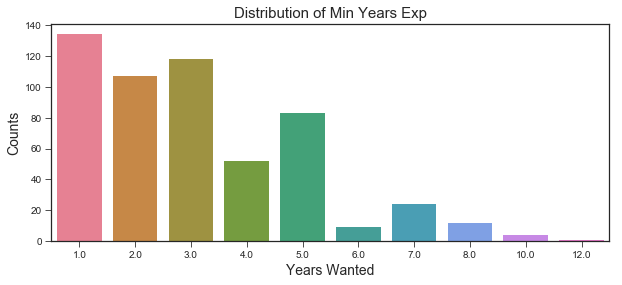

In [5]:
## Distribution of the Min Years of Experience WANTED

sns.set_style('ticks')
#Set Figure size
plt.figure(figsize=(10,4))

ax = sns.countplot(x="Min Years Exp", data=df_jobs, palette='husl')
ax.set_title('Distribution of Min Years Exp', fontsize=15)
ax.set_xlabel('Years Wanted', fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
plt.show()

- Seem to have more demand for in the earlier years of experience.

#### Rank/Ordinal the Job Levels

In [1049]:
df_jobs['Job Level'].value_counts()

4    236
2    148
5     70
1     36
3     30
6     24
Name: Job Level, dtype: int64

In [1050]:
## Take the Average Salary per JOB LEVEL - This is just to have an idea to give it an ordinal rank
df_jobs.groupby('Job Level')['Mean Sal'].mean()

Job Level
1    3664.861111
2    4384.560946
3    4746.666667
4    4975.445274
5    5399.175824
6    7416.145833
Name: Mean Sal, dtype: float64

In [1051]:
ranks = {'Entry Level': 1, 'Junior Executive': 2, 'Non-Executive': 3, 'Senior Executive': 4, 'Manager': 5, 'Senior Manager':6}

In [1052]:
df_jobs['Job Level'] = df_jobs['Job Level'].map(ranks)

#### Check Correlations

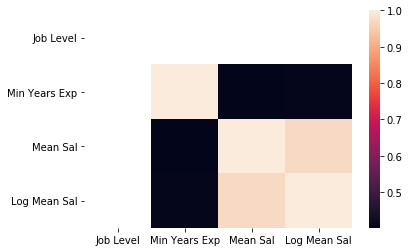

In [1053]:
sns.heatmap(df_jobs.corr(method='pearson'))

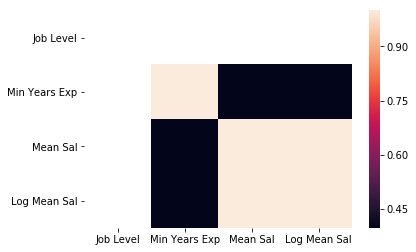

In [1054]:
sns.heatmap(df_jobs.corr(method='spearman'))

- Salary (Mean Salary) and Min Years Exp are not correlated (Note that this is the overall, not industry specific)
- Job Level is correlated with the Salary!

#### Check Mean Salary Distribution - np.log mean salary

In [12]:
df_jobs.head(1)

,Company,Title,Location,Address,Industry,JD,Job Level,Base Title,Min Years Exp,Mean Sal
0,Career Edge Asia Pte Ltd,Senior Data Analyst ($7K - $8K / CBD/ MNC ) re...,Singapore - Across Singapore,NaN,Human Resources Management/Consulting,CAREER EDGE ASIA PTE LTD EA Licence Number ...,4,DA,3.0,7000.0


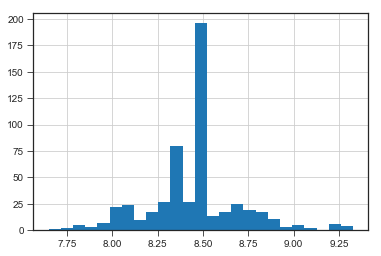

In [13]:
## Salary Distrib
df_jobs['Mean Sal'].apply(np.log).hist(bins=25)

In [14]:
import statsmodels.api as sm
import scipy.stats as stats

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Text(0.5,1,u'Mean Sal - After Log')

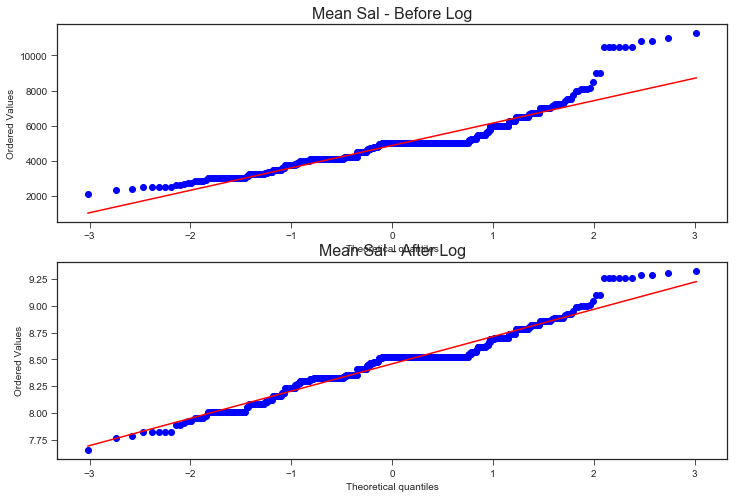

In [15]:
## Log Mean Sal ##

f, (ax1, ax2) = plt.subplots(2,figsize=(12,8))
res = stats.probplot(df_jobs['Mean Sal'], plot=ax1)
ax1.set_title('Mean Sal - Before Log', fontsize=16)

## NEW COLUMN - ['Log Mean Sal']
df_jobs['Log Mean Sal'] = np.log(df_jobs['Mean Sal'])
res = stats.probplot(df_jobs['Log Mean Sal'], plot=ax2)
ax2.set_title('Mean Sal - After Log', fontsize=16)

#### BACK UP

In [1058]:
df_jobs.to_csv('Jobstreet_prep_pipeline.csv')

## Prepare Pipeline

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score,precision_score, recall_score, auc, roc_curve,roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer

## Import Regex
import re
import string

# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, LabelBinarizer

import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

from sklearn.svm import SVR

In [3]:
## Custom Lemmatizer to Tokenzier
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [4]:
df_jobs = pd.read_csv('Jobstreet_prep_pipeline.csv')
df_jobs.reset_index(drop=True, inplace=True)
df_jobs = df_jobs.drop('Unnamed: 0', axis=1)

df_jobs_tts = df_jobs.copy()

#### Custom Pipeline Function to Dummy Out the 'Industry' feature

In [5]:
class IndustryPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = []
    
    def _make_industry_dummies(self, df):
        df = pd.get_dummies(df, columns=['Industry'], drop_first=True)
        #print df.columns
        return df
    
    def transform(self, X, *args):
        X = self._make_industry_dummies(X)
        self.feature_names = X.columns  ## Keep Track of the Columns after Dummy Out
        return X
    def fit(self, X, *args):
        return self

In [6]:
class JobBaseTitlePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = []
    
    def _make_basetitle_dummies(self, df):
        df = pd.get_dummies(df, columns=['Base Title'], drop_first=True)
        #print df.columns
        return df
    
    def transform(self, X, *args):
        X = self._make_basetitle_dummies(X)
        self.feature_names = X.columns  ## Keep Track of the Columns after Dummy Out
        return X
    def fit(self, X, *args):
        return self

In [7]:
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key, dt):
        self.key = key
        self.dt = dt

    def fit(self, x, y=None):
        # does nothing
        return self

    def transform(self, data_dict):
        # this returns the column requested
        print "Selecting",self.key
        if self.dt == 'text':
            return data_dict.loc[:,self.key]
        else:
            return data_dict.loc[:,[self.key]].astype(float)

#### Train Test Split

In [8]:
df_jobs_tts['Base Title'] = df_jobs_tts['Base Title'].astype('category')
df_jobs_tts['Industry'] = df_jobs_tts['Industry'].astype('category')

In [9]:
## Final Text Clean up
df_jobs_tts['JD'] = df_jobs_tts['JD'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())
df_jobs_tts['JD'] = df_jobs_tts['JD'].str.replace('\d+', '') # for digits
df_jobs_tts['JD'] = df_jobs_tts['JD'].str.replace(r'(\b\w{1,2}\b)', '') # for words
df_jobs_tts['JD'] = df_jobs_tts['JD'].str.replace('[^\w\s]', '') # for punctuation 
#df_jobs_tts['JD'] = df_jobs_tts['JD'].str.replace('[\W_]+','') # only 

## Final Text Clean up
df_jobs_tts['Title'] = df_jobs_tts['Title'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())
df_jobs_tts['Title'] = df_jobs_tts['Title'].str.replace('\d+', '') # for digits
df_jobs_tts['Title'] = df_jobs_tts['Title'].str.replace(r'(\b\w{1,2}\b)', '') # for words
df_jobs_tts['Title'] = df_jobs_tts['Title'].str.replace('[^\w\s]', '') # for punctuation 
#df_jobs_tts['Title'] = df_jobs_tts['Title'].str.replace('[\W_]+','') # only 


## Final Text Clean up
df_jobs_tts['Location'] = df_jobs_tts['Location'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())
df_jobs_tts['Location'] = df_jobs_tts['Location'].str.replace('\d+', '') # for digits
df_jobs_tts['Location'] = df_jobs_tts['Location'].str.replace(r'(\b\w{1,2}\b)', '') # for words
df_jobs_tts['Location'] = df_jobs_tts['Location'].str.replace('[^\w\s]', '') # for punctuation 
#df_jobs_tts['Location'] = df_jobs_tts['Location'].str.replace('[\W_]+','') # only 


In [10]:
## PREP X - Everything LESS 'Log Mean Sal'
## PREP y - 'Log Mean Sal'

X = df_jobs_tts[[x for x in df_jobs_tts.columns if x not in ['Log Mean Sal','Mean Sal', 'Address', 'Company' ,'Title']]]
#X = df_jobs_tts.iloc[:,:df_jobs_tts.columns.get_loc("Log Mean Sal")] # Not Recommended -we lose everything else after.

y = df_jobs_tts['Log Mean Sal'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [11]:
print X_train.shape, y_train.shape
print y_train.shape, y_test.shape

(364, 6) (364,)
(364,) (180,)


In [12]:
X.head(1)

,Location,Industry,JD,Job Level,Base Title,Min Years Exp
0,singapore across singapore,Human Resources Management/Consulting,career edge asia pte ltd licence number ...,4,DA,3.0


#### Adding custom stop words (Spelling errors etc)

In [1634]:
from sklearn.feature_extraction import text 
my_additional_stop_words = ['acheivegroup','vanessa', 'reg','tan','wih', 'application', 'achievement', 'indicate',
                           'ambition', 'ackerman' ,'recruitment', 'ackermanglobal', 'draft', 'sell', 'acquire', 'dll',
                           'status' , 'project', 'refer', 'friend','linkedin','www','com','singapore', 'achieve', 'ha',
                           'requirement' , 'requirements', 'adapt','analyst','responsibility','monitoring','support'
                           'play' , 'skill' , 'monitored', 'refined' ,'clarify' ,'work',
                           'alvin' ,'wan','job','signal' , 'wei' ,'jie','able', 'regarding' ,'regardless' ,'month',
                           'possibility' , 'development', 'regard', 'monitor', 'hull', 'jen','new','build','process',
                           'refine', 'monday', 'ideally','use','budget','net','web','btiexecutivesearch','refers','actual',
                           'mon','tuesday','wednesday','thursday','friday','gender','refinement','mom','need',
                           'negotiation','bti','amendment','determines','refinement','kaki','bukit', 'molding','scope',
                           'negotiating','amended','tight','time','mohinani','lic','negotiate','negotiable','salary','region',
                           'monfri','neg','aws','love','module','quality','needto','ame','related','basis','loss','expect','expected',
                           'multitasks','detailsstrong','michael','availability','resume','leaving','rectify' ,'issue','recruitplus',
                           'techincal','nontechnical', 'review','including','defining','moderation','recruiting', 'sea', 'recruithaus',
                           'develops','recruitfirst','watsapp','willingness','whatsapp','email','willing','moderate','wide','variety',
                           'recruitexpress','capitagrp','capita','address','addressed','recruit','quinnoxsolutions','kindly',
                           'reusable', 'meet' ,'desired','returnoninvestment','visit','thatz','like','return','recovery','device','problem',
                           'resolution','whitebox','retrieved', 'sync' ,'hoc','whilst','west','working','day','retrieval','retaining' ,'using' ,'disclosing',
                           'wish','appl','lication','retain','disclose', 'personal','looking', 'hire','morgan','network', 'relies' ,'coordinate',
                           'near','real' ,'nrt','mrt','wellness','sport','holiday','navigation', 'behavior' ,'given',
                           'wellknown', 'established','wellestablished','nature','natural' ,'resource' ,'role', 'welcomed',
                           'problemsolving','nation' ,'goal','larc','welcome', 'successful','candidate' ,'needed' ,'participate',
                           'weekly' ,'monthly' ,'supporting', 'privacy' ,'policy' ,'consented' ,'uncertainty','associated',
                           'weng', 'hong', 'industry','necessary' ,'prepare', 'week', 'location','multitask', 'strong' ,'sense' ,'website', 'kellyservices',
                           'multisite', 'operation', 'involving' ,'record', 'leading', 'wenxing', 'license' ,'submitting','multiple', 'varied', 'source'
                           'extensible','architectural','reconstruction','navigating','reconciliation','navigate','reconciles', 'conflict' ,'dissects',
                           'software', 'extensible' ,'objective', 'reconcile', 'decompose', 'highlevel', 'smes', 'artc', 'unique','recommends', 'change', 'business',
                           'sme' ,'provide' ,'strategic', 'priority', 'soap', 'rest' ,'apis', 'recommending', 'presenting', 'exercise', 'maintan',
                           'socialurban', 'smartphone', 'app','developing','solution','exemplifying','reviewing', 'production',
                           'developer', 'develop','technically', 'implement','implement' ,'based', 'gathered' ,'regulatory','executive','search',
                           'impact', 'billion', 'patient', 'execution' ,'test' ,'idoc' ,'bapi' ,'experience', 'revenue','product',
                           'mandated','journal','technique','result', 'technical','team', 'unit', 'supported', 'fda', 'responsible' ,'support',
                           'nanyang', 'technological', 'university', 'target', 'track','apologize', 'modifies', 'tang','lee','response','maintain', 'low',
                           ]
                
#my_additional_stop_words = []
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [1635]:
# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    transformer_list=[
        ('JobLevel', Pipeline([
            ('selector', ItemSelector(key='Job Level', dt='num'))
        ])),
        ('JD', Pipeline([
            ('selector', ItemSelector(key='JD', dt='text')),
            #                     ('vectorizer', CountVectorizer(stop_words='english',
            #                                                    strip_accents='unicode',
            #                                                    tokenizer=LemmaTokenizer(),
            #                                                    lowercase=True,
            #                                                    ngram_range=(1,1))),
            ('tfidf', TfidfVectorizer(stop_words=stop_words,
                                      tokenizer=LemmaTokenizer(),
                                      lowercase=True,
                                      use_idf=True, ngram_range=(1, 3),
                                      max_features=100000, max_df=0.9, min_df=1,
                                      norm='l2')),
            # ('tfidfvect', TfidfTransformer())
        ])),
#         ('Title', Pipeline([
#             ('selector', ItemSelector(key='Title', dt='text')),
#             #             ('vectorizer', CountVectorizer(stop_words='english',
#             #                                            strip_accents='unicode',
#             #                                            tokenizer=LemmaTokenizer(),
#             #                                            lowercase=True,
#             #                                            ngram_range=(1,2))),
#             ('tfidf', TfidfVectorizer(stop_words=stop_words,
#                                       tokenizer=LemmaTokenizer(),
#                                       lowercase=True,
#                                       use_idf=True, ngram_range=(1, 2),
#                                       norm='l1',
#                                       max_features=1500, max_df=0.95))
#             #                                       max_df = 0.95,
#             #                                       min_df = 0.15)
#         ])),

        #         ('Location', Pipeline([
        #             ('selector', ItemSelector(key='Location', dt='text')),
        # #             ('vectorizer', CountVectorizer(stop_words='english',
        # #                                            strip_accents='unicode',
        # #                                            tokenizer=LemmaTokenizer(),
        # #                                            lowercase=True,
        # #                                            ngram_range=(1,3),
        # #                                           max_features=15000)),
        #             ('tfidf', TfidfVectorizer(stop_words='english',
        #                                       tokenizer=LemmaTokenizer(),
        #                                       lowercase=True,
        #                                       use_idf=True, ngram_range=(1, 2),
        #                                       max_features=10000,
        #                                       norm='l1',
        #                                       max_df = 0.95,
        #                                       min_df = 0.35
        #                                       )),
        #         ]))
    ],
)

# Instantiate nested pipeline: pl
pl = Pipeline([
    ('basetitle', JobBaseTitlePreprocessor()),  # Dummy Out
    ('indus', IndustryPreprocessor()),  # Dummy Out
    ('union', process_and_join_features),
    # ('Ridge', RidgeCV(alphas=[0.01], cv=5)) #('Accuracy: ', 0.4065451855897821)
    # ('Ridge', Ridge(alpha=0.001)) # ('Accuracy: ', 0.4001055039957753)
    # ('Accuracy: ', 0.4880531817123954)
    ('eNet', ElasticNet(l1_ratio=0.0, alpha=0.001))
])

In [1636]:
# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
R2 = pl.score(X_test, y_test)
print("R2: ", R2)

Selecting Job Level
Selecting JD
Selecting Job Level
Selecting JD
('R2: ', 0.4977059635604082)


In [1637]:
dummy_cols = pl.named_steps['indus'].feature_names.tolist()
# Numeric Cols 
numeric_cols = ['Job Level']
# TDIDF FOR JD
jd_cols = pl.named_steps['union'].transformer_list[1][1].named_steps['tfidf'].get_feature_names()


X_train_csr_cols = dummy_cols + numeric_cols + jd_cols

In [1638]:
#get strongest features affecting salary
coefs = list(zip(X_train_csr_cols, pl.named_steps['eNet'].coef_))
coefs = pd.DataFrame.from_records(coefs)
coefs['abs'] = abs(coefs[1])
print 'Top Positive Factors on Salary:'
print coefs[coefs[1] > 0].sort_values('abs', ascending=False).head(10)
print 
print 'Top Negative Factors on Salary:'
print coefs[coefs[1] < 0].sort_values('abs', ascending=False).tail(10)
#print coefs[coefs[1] < 0].sort_values('abs', ascending=False).head(10)
#http://www.cazaar.com/ta/econ113/interpreting-beta

Top Positive Factors on Salary:
                                 0         1       abs
38975    neural biomedical science  0.174054  0.174054
17767    different function degree  0.166854  0.166854
38710  motivates recognises talent  0.155556  0.155556
48095    regional office alignment  0.135187  0.135187
13856        dashboard interactive  0.131576  0.131576
34520                        ltdea  0.118079  0.118079
14961     data science conjunction  0.114566  0.114566
57188       teamwork communication  0.110919  0.110919
8841        clearly professionally  0.110538  0.110538
50363                   right main  0.106730  0.106730

Top Negative Factors on Salary:
                                       0             1           abs
43338                        playerother -1.820295e-05  1.820295e-05
43337        playerinterested party send -1.820295e-05  1.820295e-05
35600                  management people -1.820295e-05  1.820295e-05
35601       management people management -1.820295e-05

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.


## MODEL 1: Using a LINEAR model to Predict Salary -> Best result is approx 50%. However the text/words from the NLP segment do not make any sense. Even after removing more words (by adding to the stop words, this model doesnt make sense)

## ATTEMP Q1 - MODEL 2

In [1605]:
## QCut / Bin the Mean Salary

df_jobs_tts['Sal Range'] = pd.qcut(df_jobs_tts['Mean Sal'], 5, labels=["High","Mid-High","Mid","Mid-Low","Low"])

In [1606]:
df_jobs_tts

,Company,Title,Location,Address,Industry,JD,Job Level,Base Title,Min Years Exp,Mean Sal,Log Mean Sal,Sal Range
0,Career Edge Asia Pte Ltd,senior data analyst cbd mnc ref,singapore across singapore,NaN,Human Resources Management/Consulting,career edge asia pte ltd licence number ...,4,DA,3.0,7000.000000,8.853665,Low
1,YGP Pte Ltd,data analyst,singapore central downtown core tanjong ...,79 Anson Road Singapore,Automobile/Automotive Ancillary/Vehicle,application management register gather new...,2,DA,2.0,3500.000000,8.160518,High
2,None,data analyst,singapore central,2 Bukit Merah Central Podium #04-00,Wood/Fibre/Paper,requirements key responsibilities report ...,1,DA,1.0,4200.000000,8.342840,Mid-High
3,nSearch Global Pte Ltd,senior business analyst data analytics pro...,singapore central,NaN,Human Resources Management/Consulting,senior business analyst only shortlisted ca...,4,DA,5.0,5000.000000,8.517193,Mid
4,Adecco Personnel Pte Ltd.,data analyst pivot table look,singapore across singapore singapore,NaN,Education,the opportunity adecco partnering with reno...,1,DA,1.0,4000.000000,8.294050,High
5,(Recruitment Firm),data analysts clementi months ext...,singapore central,8 Marina View #11-01 Asia Square Tower 1 Singa...,Human Resources Management/Consulting,license reg lerh chun ...,2,DA,2.0,3250.000000,8.086410,High
6,RECRUIT EXPRESS PTE LTD,data analyst perm good career prospect,singapore central,NaN,Healthcare/Medical,well versed data analysis and mining dashboa...,4,DA,1.0,4000.000000,8.294050,High
7,Sopra Steria Asia Pte Ltd,data analyst,singapore west others one north,"3, Fusionopolis Way Symbiosis #12-27","Consulting (IT, Science, Engineering & Technical)",communicating with cross functional team ide...,2,DA,7.0,5000.000000,8.517193,Mid
8,United Overseas Bank Limited (UOB),business data analyst enterprise data strat...,singapore across singapore singapore,NaN,Banking/Financial Services,the data management office dmo business ...,4,DA,7.0,5000.000000,8.517193,Mid
9,DBS Bank Limited,senior associate associate mis analyst group...,singapore across singapore singapore,NaN,Banking/Financial Services,business function group technology and operat...,4,DA,4.0,4656.250000,8.445966,Mid


In [623]:
## GRID SEARCH
param_grid = {
    'eNet__max_iter': [1, 5, 10],
    'eNet__alpha': np.arange(0.0001, 0.0015, 0.0005),
}

In [624]:
grid = GridSearchCV(pl, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print grid.best_params_

print grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Selecting Min Years Exp
Selecting Job Level
Selecting Min Years Exp
Selecting Min Years Exp
Selecting JD
Selecting Job Level
Selecting JD
Selecting Job Level
Selecting JD
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Title
Selecting Title
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Min Years Exp
Selecting Job Level
Selecting Min Years Exp
Selecting Job Level
Selecting Min Years Exp
Selecting JD
Selecting Job Level
Selecting JD
Selecting JD
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Title
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Title
Selecting Title
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecti

Selecting Job Level
Selecting JD
Selecting Title
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Title
Selecting Title
Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
Selecting Min Years Exp
Selecting Job Level

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.4min finished


Selecting Min Years Exp
Selecting Job Level
Selecting JD
Selecting Title
{'eNet__max_iter': 10, 'eNet__alpha': 0.0011}
0.42913111326964626
